<a href="https://colab.research.google.com/github/mehhdiii/surface-classification-using-imu-data/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [2]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

mehdirazakhorasani_imu_dataset_path = kagglehub.dataset_download('mehdirazakhorasani/imu-dataset')
mehdirazakhorasani_ml_project_dataset_path = kagglehub.dataset_download('mehdirazakhorasani/ml-project-dataset')

print('Data source import complete.')


100%|██████████| 34.8M/34.8M [00:03<00:00, 11.5MB/s]

Extracting files...


100%|██████████| 34.8M/34.8M [00:04<00:00, 8.86MB/s]

Extracting files...


Data source import complete.


In [8]:
print(mehdirazakhorasani_imu_dataset_path)

/root/.cache/kagglehub/datasets/mehdirazakhorasani/imu-dataset/versions/1


In [3]:
import numpy as np
import pandas as pd
import os
from time import time
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from matplotlib import rcParams
%matplotlib inline
le = preprocessing.LabelEncoder()
from numba import jit
import itertools
from seaborn import countplot,lineplot, barplot
from numba import jit
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from scipy.stats import randint as sp_randint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import matplotlib.style as style
style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')
import gc
gc.enable()

In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [6]:
# load data:
X_test = pd.read_csv(mehdirazakhorasani_imu_dataset_path + '/X_test.csv')

X_train = pd.read_csv(mehdirazakhorasani_imu_dataset_path + '/X_train.csv')
y_train = pd.read_csv(mehdirazakhorasani_imu_dataset_path + '/y_train.csv')

In [9]:
#training dataset overview:
print("size: ", X_train.size)
X_train.loc[X_train['series_id']==3809].size
X_train

size:  6339840


,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.104880,-0.105970,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.104900,-0.106000,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.104920,-0.105970,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.104950,-0.105970,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.104950,-0.105960,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410
...,...,...,...,...,...,...,...,...,...,...,...,...,...
487675,3809_123,3809,123,0.62871,-0.76878,-0.084391,0.081093,0.003167,0.093760,-0.142740,3.27180,2.0115,-9.0063
487676,3809_124,3809,124,0.62884,-0.76868,-0.084365,0.081099,0.014994,0.032637,-0.132380,4.42750,3.0696,-8.1257
487677,3809_125,3809,125,0.62891,-0.76861,-0.084345,0.081178,-0.031184,-0.003961,-0.138940,2.70480,4.2622,-8.1443
487678,3809_126,3809,126,0.62903,-0.76850,-0.084414,0.081231,-0.069153,0.013229,-0.130210,2.54100,4.7130,-9.4435


In [10]:
# print("size: ", X_test.size)
# X_test

In [11]:
#train test split size comparision:
splitTrainPercentage = float(X_train.size)/float(X_train.size+X_test.size)
print('train %: ', splitTrainPercentage*100)
print('test %: ', (1-splitTrainPercentage)*100)

train %:  49.96066089693155
test %:  50.03933910306845


In [14]:
#labels:
print('size: ', y_train.size)
y_train
# y_train.loc[y_train['surface']=='concrete']

size:  11430


,series_id,group_id,surface
0,0,13,fine_concrete
1,1,31,concrete
2,2,20,concrete
3,3,31,concrete
4,4,22,soft_tiles
...,...,...,...
3805,3805,55,tiled
3806,3806,67,wood
3807,3807,48,fine_concrete
3808,3808,54,tiled


In [15]:
# check for missing data in train test:
totalt = X_train.isnull().sum().sort_values(ascending=False)
print(totalt)

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64


In [17]:
# check for missing data in train test:
totalt = X_test.isnull().sum().sort_values(ascending=False)
print(totalt)

row_id                   0
series_id                0
measurement_number       0
orientation_X            0
orientation_Y            0
orientation_Z            0
orientation_W            0
angular_velocity_X       0
angular_velocity_Y       0
angular_velocity_Z       0
linear_acceleration_X    0
linear_acceleration_Y    0
linear_acceleration_Z    0
dtype: int64


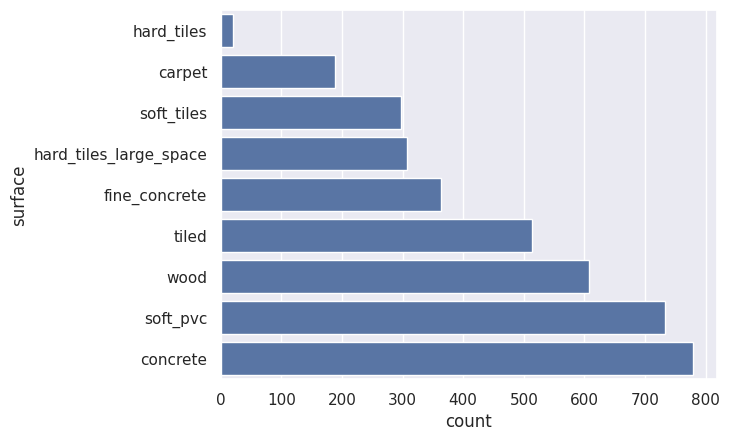

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='darkgrid')
sns.countplot(y = 'surface',
              data = y_train,
              order = y_train['surface'].value_counts(ascending=True).index)
plt.show()

max group_id: 72
min group_id: 0


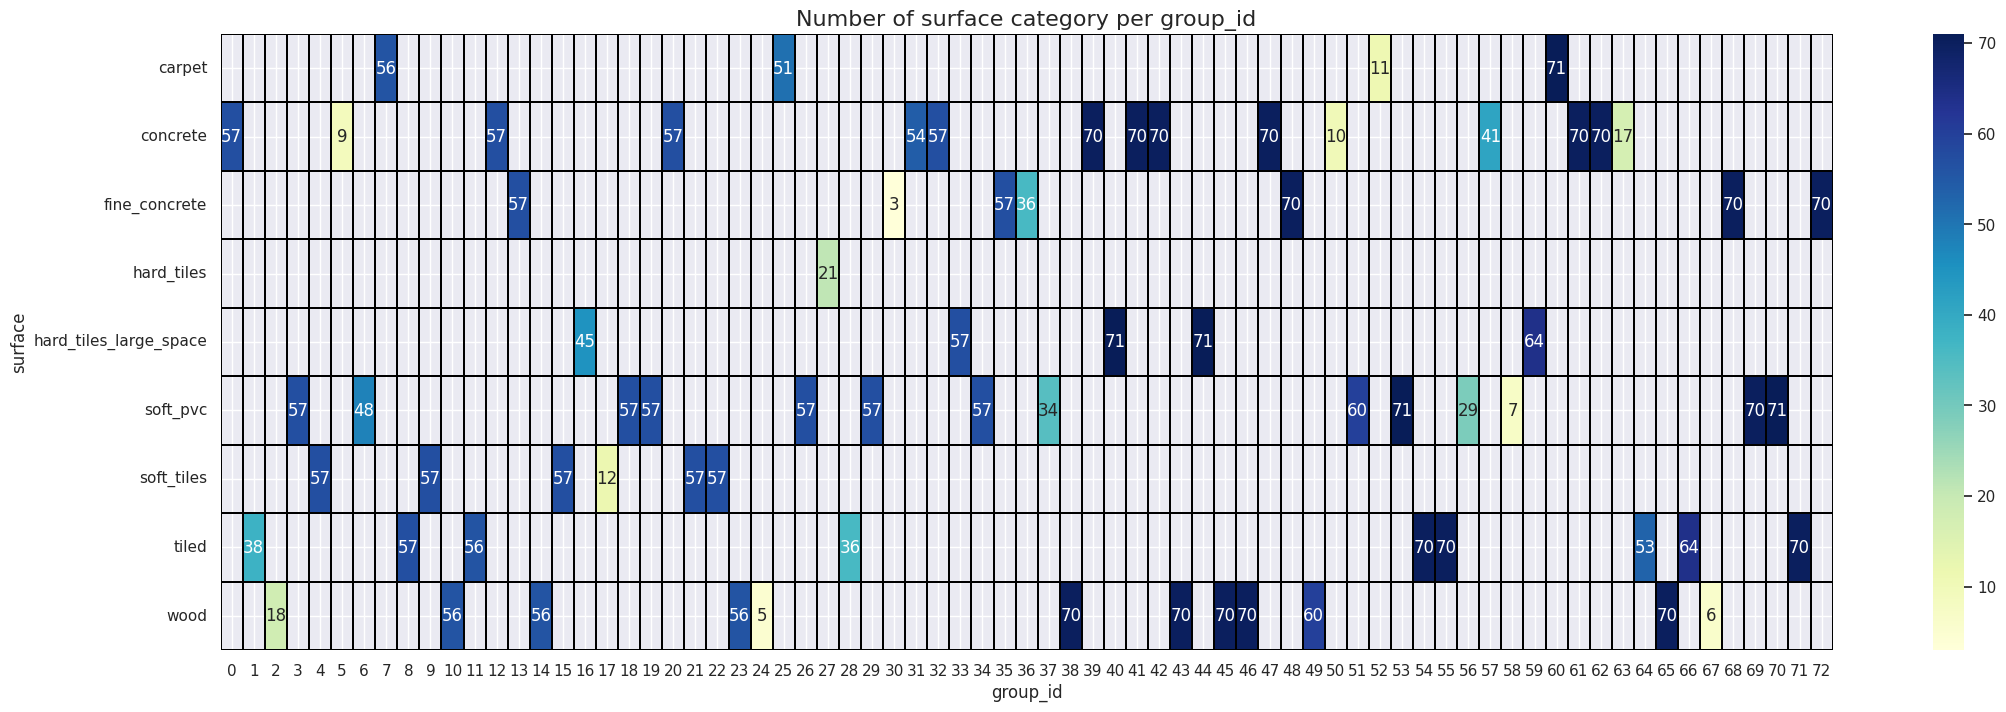

In [22]:
print('max group_id:', y_train['group_id'].max())
print('min group_id:', y_train['group_id'].min())

fig, ax = plt.subplots(1,1,figsize=(26,8))
groupedBySurfaceAndGroupId = y_train.groupby(['surface', 'group_id'])['series_id'].count().reset_index()
pivoted = groupedBySurfaceAndGroupId.pivot(index='surface', columns='group_id', values='series_id')
heatmap = sns.heatmap(pivoted, linewidths=.1, linecolor='black', annot=True, cmap="YlGnBu")
heatmap.set_title('Number of surface category per group_id', size=16)
plt.show()


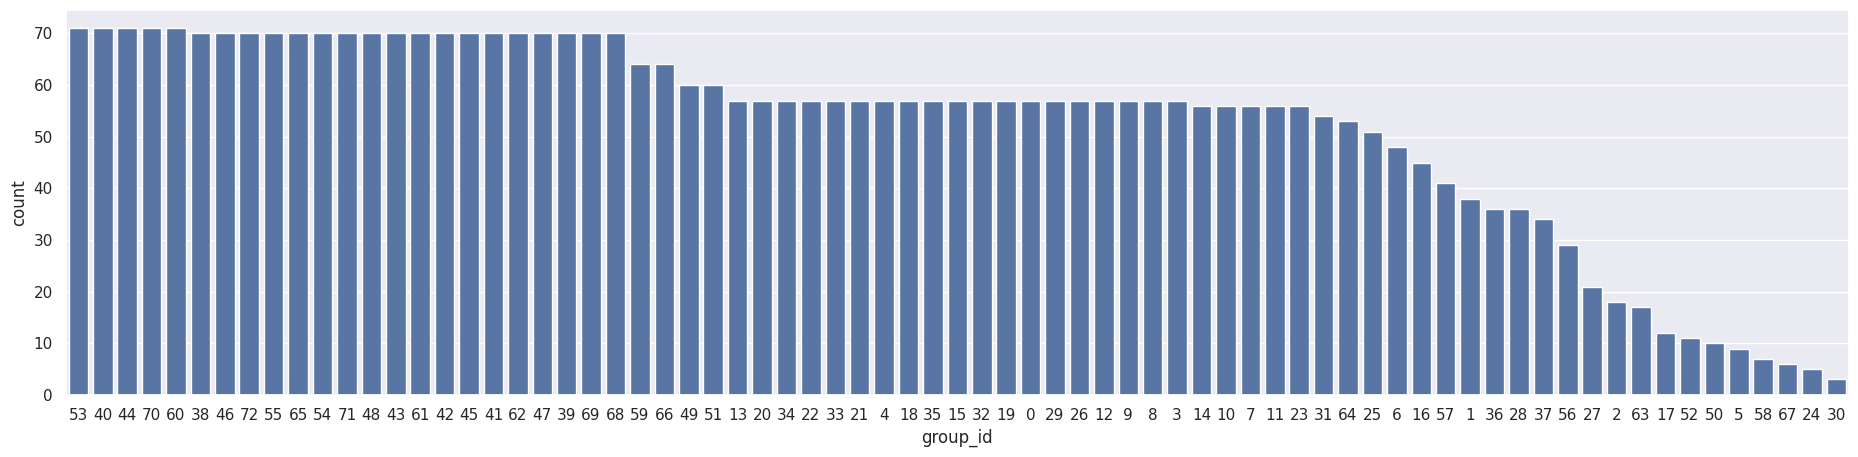

In [23]:
plt.figure(figsize=(23,5))
sns.set(style="darkgrid")
sns.countplot(x="group_id", data=y_train, order = y_train['group_id'].value_counts().index)
plt.show()

In [24]:
series0 = X_train.loc[X_train['series_id'] == 0]
series0.head()

,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128
2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [25]:
y_train.loc[y_train['series_id'] == 0]

,series_id,group_id,surface
0,0,13,fine_concrete


In [26]:
series0.describe()

,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
count,128.0,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000,128.000000
mean,0.0,63.500000,-0.758666,-0.634008,-0.105474,-0.106470,-0.002481,-0.003306,0.007532,0.263418,2.984195,-9.320391
std,0.0,37.094474,0.000363,0.000471,0.000432,0.000389,0.052800,0.031544,0.017127,0.911175,1.387790,1.095040
min,0.0,0.000000,-0.759530,-0.634560,-0.106140,-0.107050,-0.160410,-0.079404,-0.030181,-1.864400,0.075417,-12.512000
25%,0.0,31.750000,-0.758927,-0.634383,-0.105873,-0.106775,-0.029069,-0.027110,-0.005289,-0.362872,1.791050,-9.875850
50%,0.0,63.500000,-0.758530,-0.634270,-0.105500,-0.106555,-0.005082,-0.004037,0.006842,0.231665,3.407550,-9.429950
75%,0.0,95.250000,-0.758367,-0.633530,-0.105078,-0.106130,0.035803,0.020031,0.020088,0.905635,4.119200,-8.633425
max,0.0,127.000000,-0.758220,-0.633060,-0.104610,-0.105590,0.107650,0.072698,0.051720,2.853800,5.386400,-6.268100


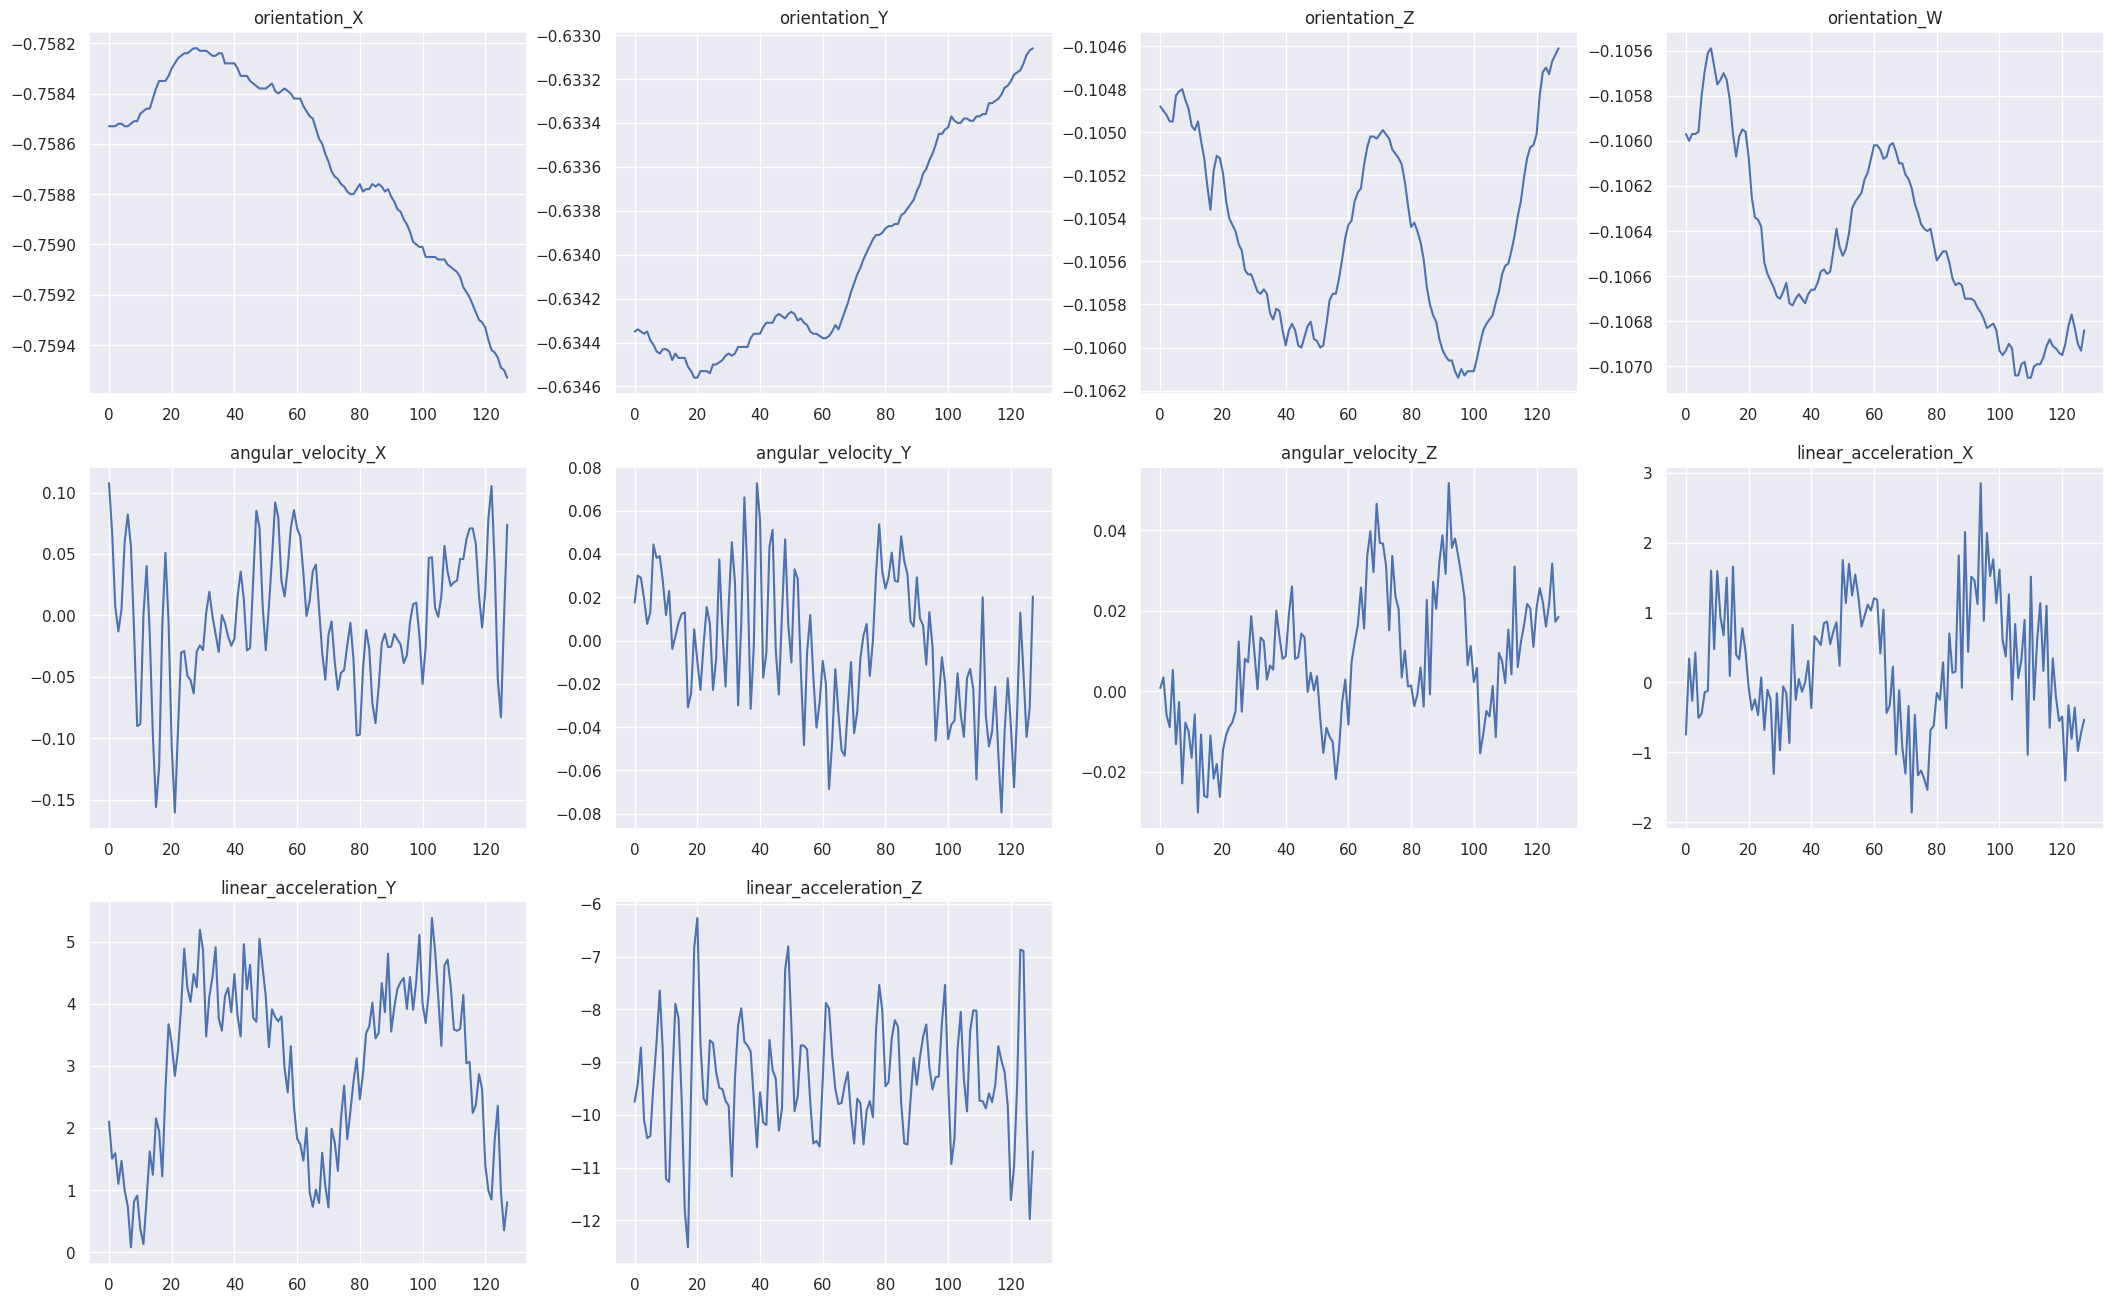

In [27]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(series0.columns[3:]):
    plt.subplot(3, 4, i + 1)
    plt.plot(series0[col])
    plt.title(col)

In [28]:
series_dict = {}
for series in (X_train['series_id'].unique()):
    series_dict[series] = X_train[X_train['series_id'] == series]

In [29]:
import matplotlib.style as style
style.use('ggplot')
def plotSeries(series_id):
    style.use('ggplot')
    plt.figure(figsize=(28, 16))
    print(y_train[y_train['series_id'] == series_id]['surface'].values[0].title())
    for i, col in enumerate(series_dict[series_id].columns[3:]):
        if col.startswith("o"):
            color = 'red'
        elif col.startswith("a"):
            color = 'green'
        else:
            color = 'blue'
        if i >= 7:
            i+=1
        plt.subplot(3, 4, i + 1)
        plt.plot(series_dict[series_id][col], color=color, linewidth=3)
        plt.title(col)

Carpet


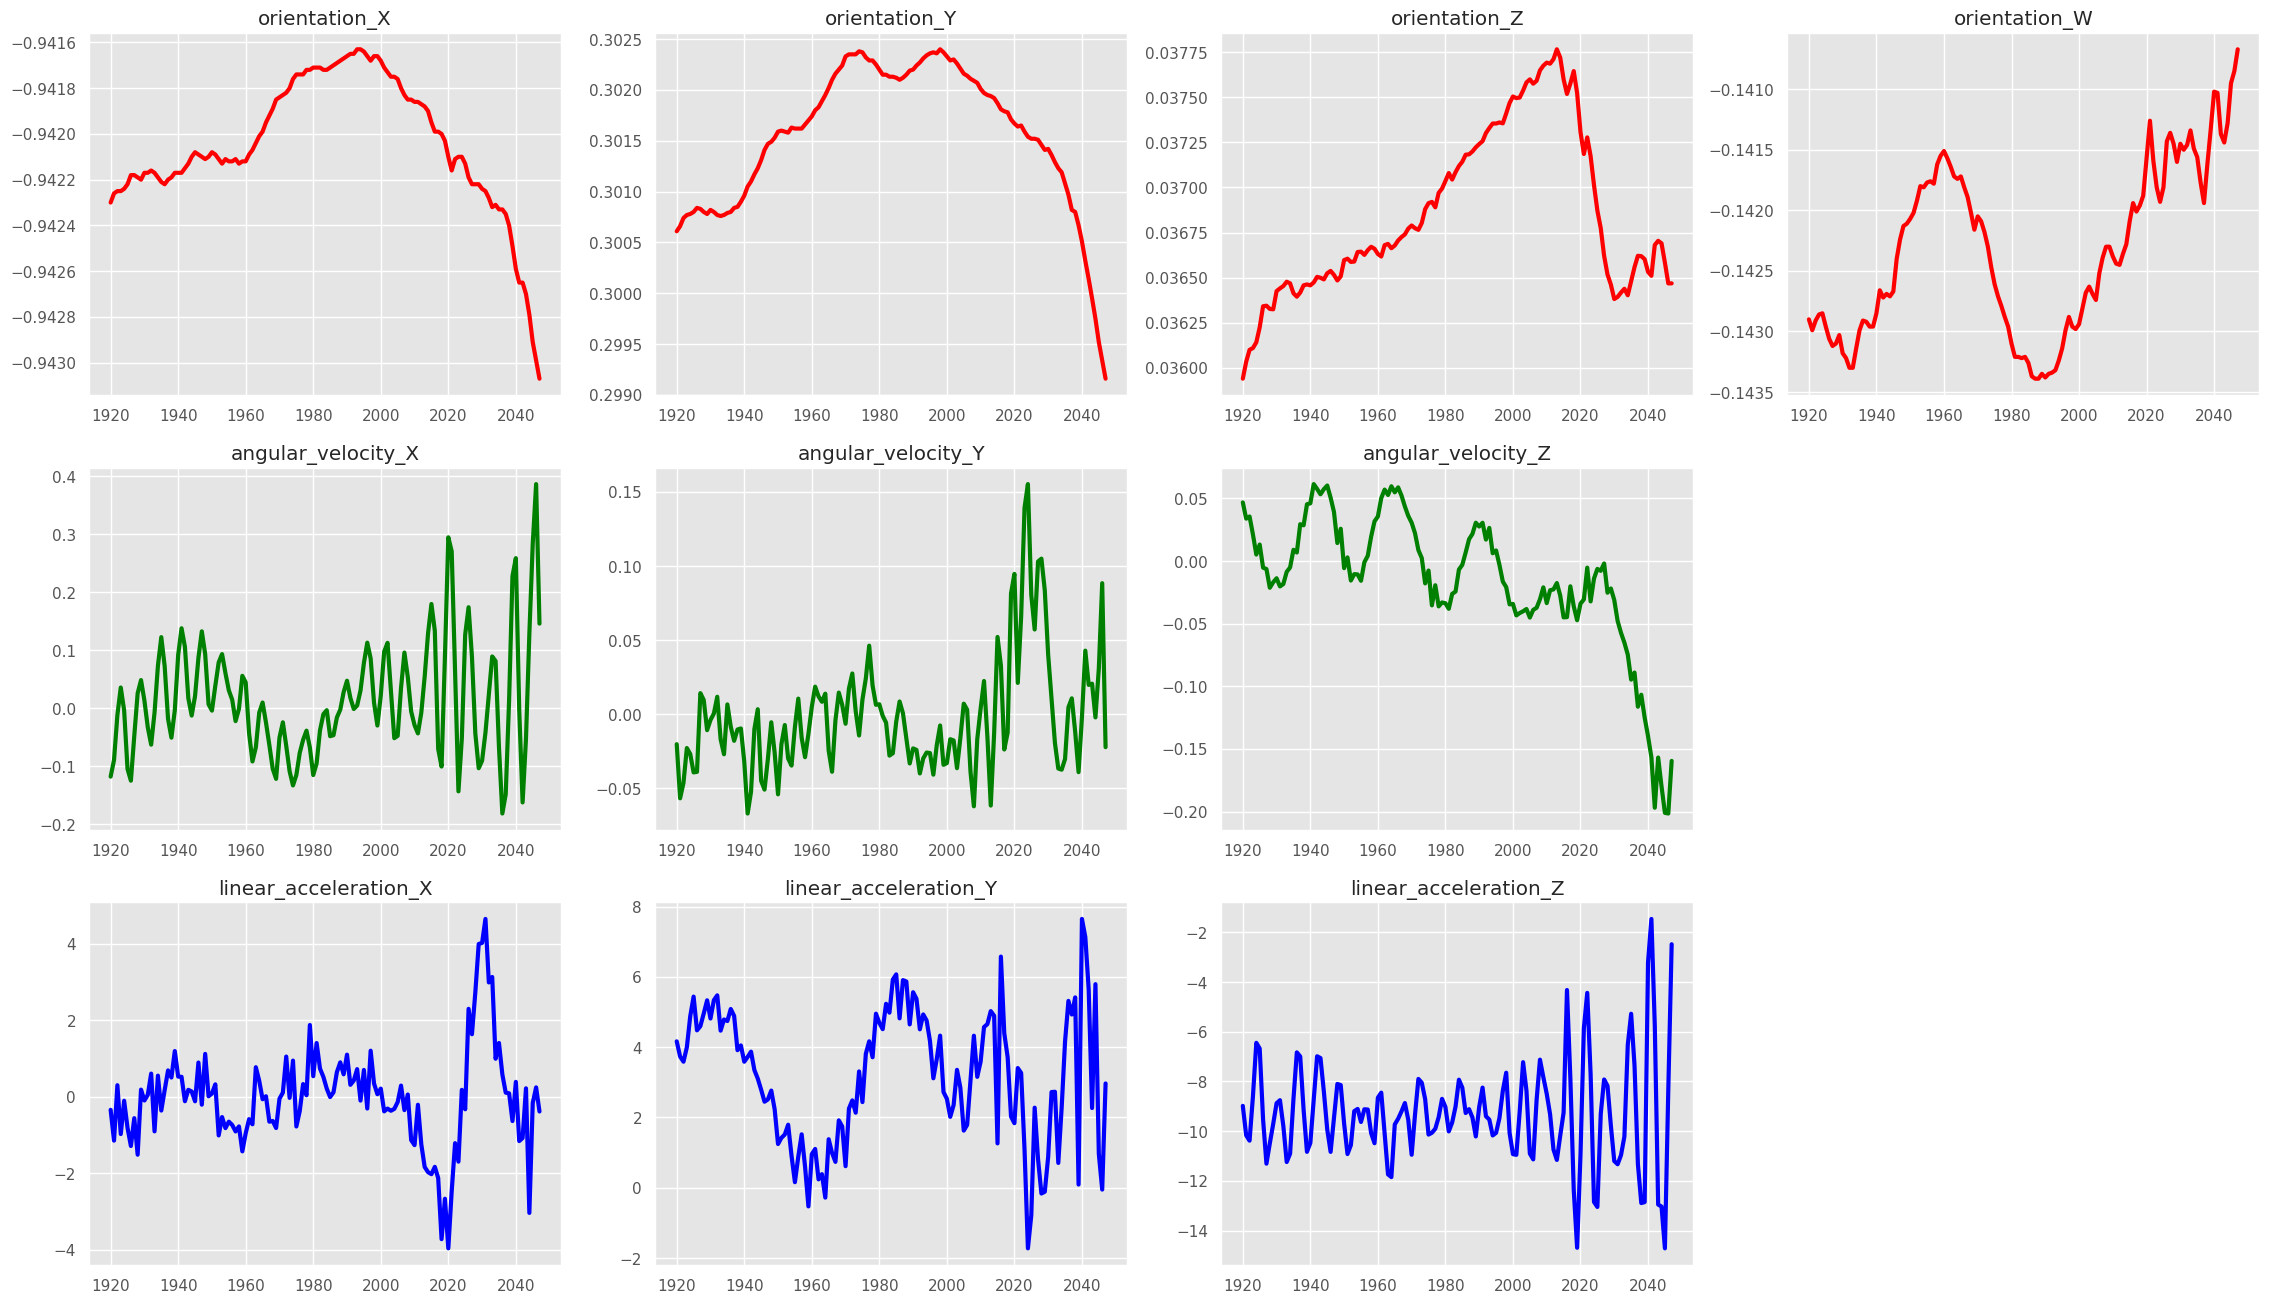

In [30]:
id_series = 15
plotSeries(id_series)

<Axes: >

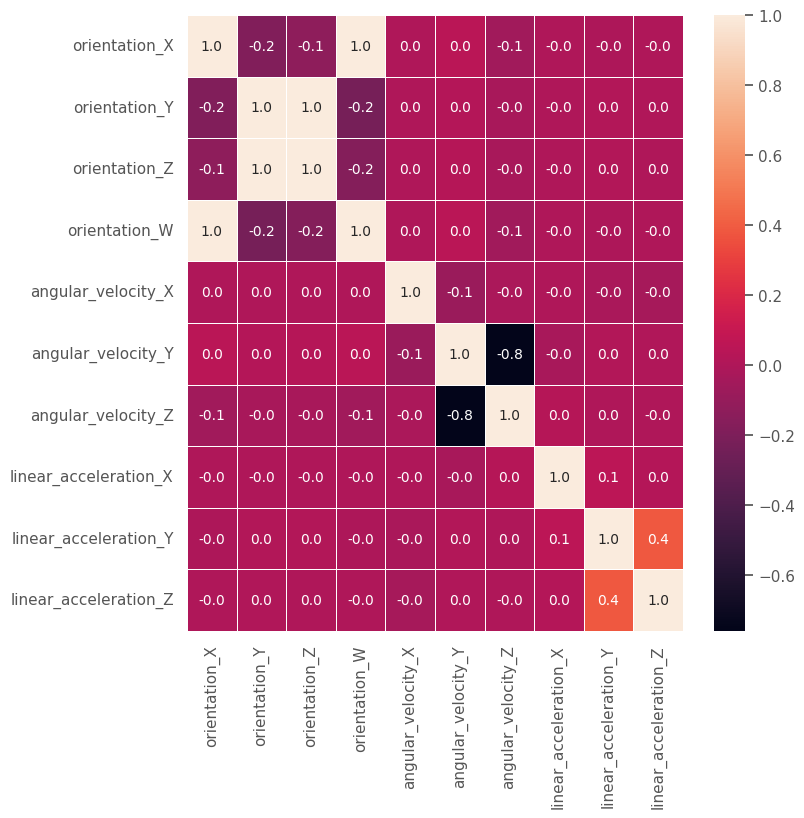

In [31]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(X_train.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

<Axes: >

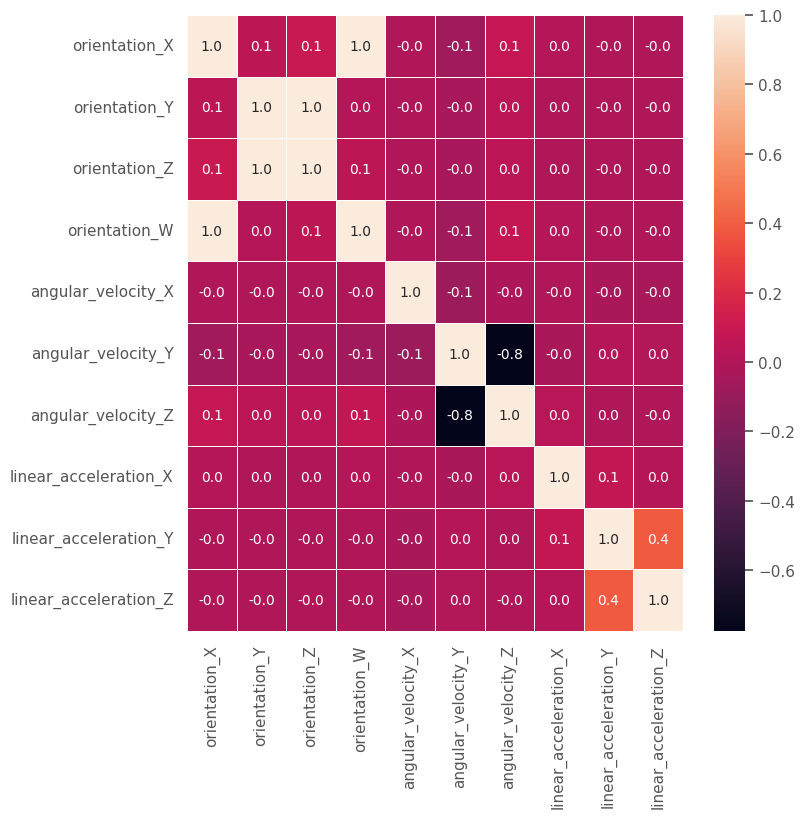

In [32]:
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(X_test.iloc[:,3:].corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

# FOURIER


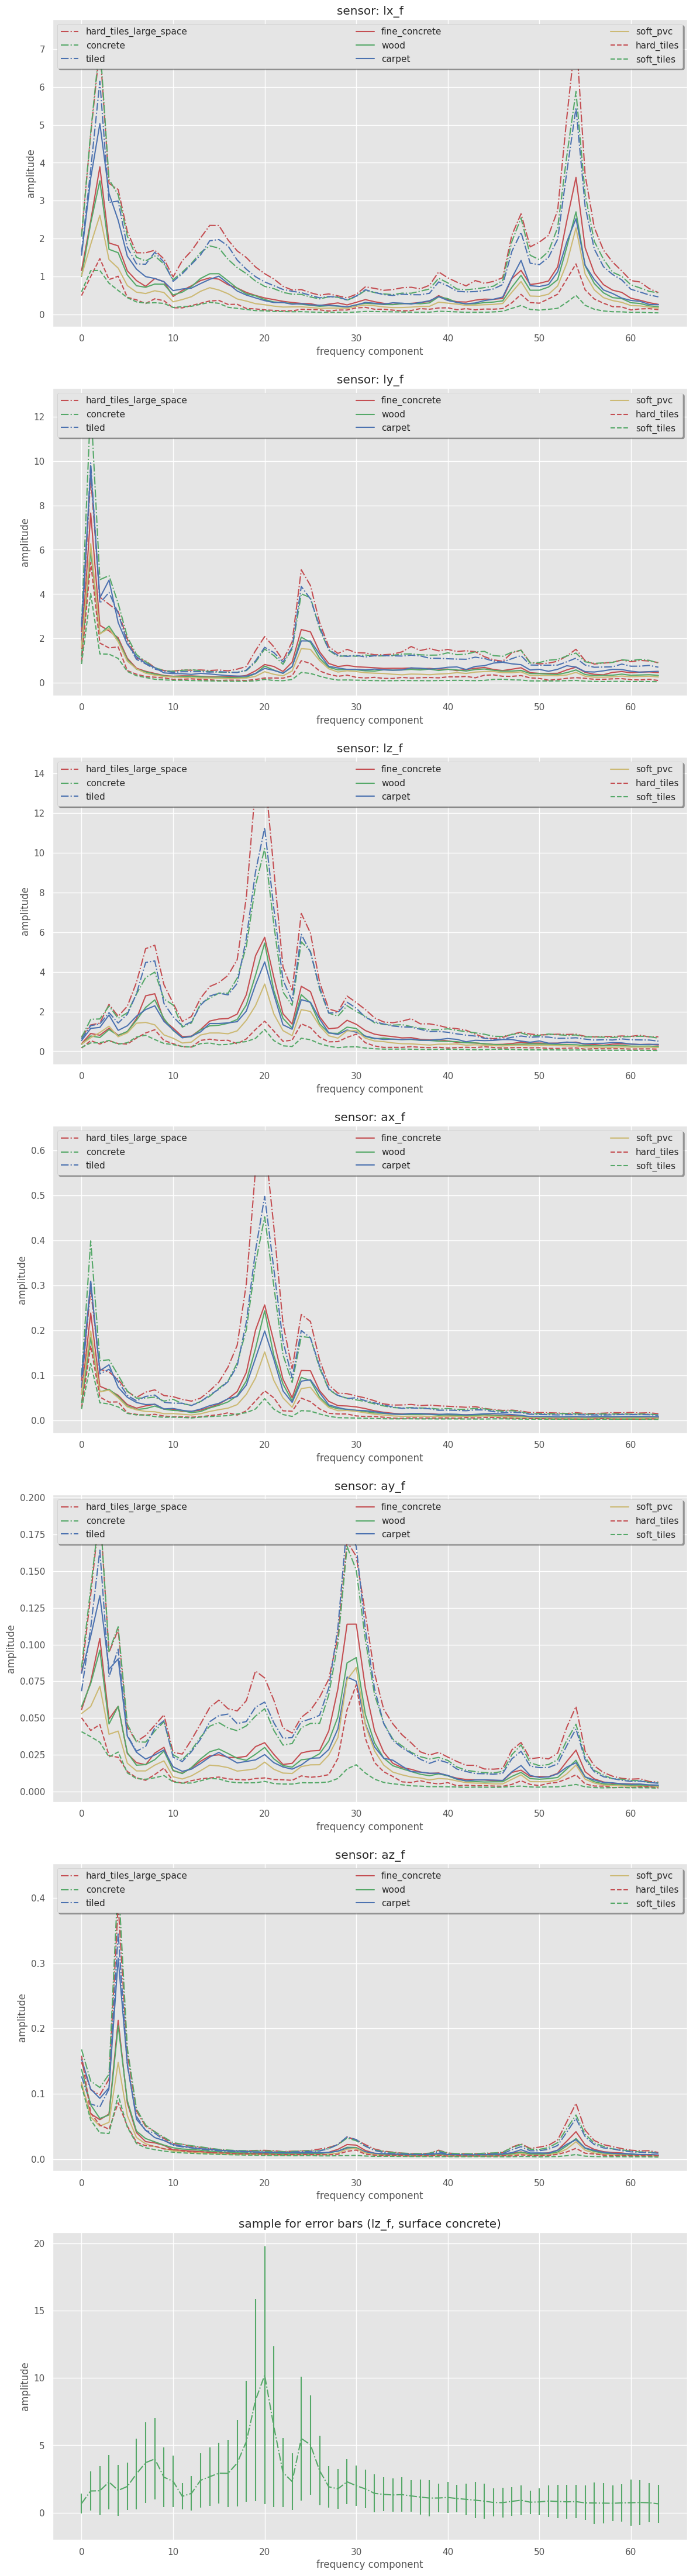

In [34]:

train_x = pd.read_csv(mehdirazakhorasani_imu_dataset_path + '/X_train.csv')
train_y = pd.read_csv( mehdirazakhorasani_imu_dataset_path + '/y_train.csv')
import math

def prepare_data(t):
    def f(d):
        d=d.sort_values(by=['measurement_number'])
        return pd.DataFrame({
         'lx':[ d['linear_acceleration_X'].values ],
         'ly':[ d['linear_acceleration_Y'].values ],
         'lz':[ d['linear_acceleration_Z'].values ],
         'ax':[ d['angular_velocity_X'].values ],
         'ay':[ d['angular_velocity_Y'].values ],
         'az':[ d['angular_velocity_Z'].values ],
        })

    t= t.groupby('series_id').apply(f)

    def mfft(x):
        return [ x/math.sqrt(128.0) for x in np.absolute(np.fft.fft(x)) ][1:65]

    t['lx_f']=[ mfft(x) for x in t['lx'].values ]
    t['ly_f']=[ mfft(x) for x in t['ly'].values ]
    t['lz_f']=[ mfft(x) for x in t['lz'].values ]
    t['ax_f']=[ mfft(x) for x in t['ax'].values ]
    t['ay_f']=[ mfft(x) for x in t['ay'].values ]
    t['az_f']=[ mfft(x) for x in t['az'].values ]
    return t

t=prepare_data(train_x)
t=pd.merge(t,train_y[['series_id','surface','group_id']],on='series_id')
t=t.rename(columns={"surface": "y"})

def aggf(d, feature):
    va= np.array(d[feature].tolist())
    mean= sum(va)/va.shape[0]
    var= sum([ (va[i,:]-mean)**2 for i in range(va.shape[0]) ])/va.shape[0]
    dev= [ math.sqrt(x) for x in var ]
    return pd.DataFrame({
        'mean': [ mean ],
        'dev' : [ dev ],
    })

display={
'hard_tiles_large_space':'r-.',
'concrete':'g-.',
'tiled':'b-.',

'fine_concrete':'r-',
'wood':'g-',
'carpet':'b-',
'soft_pvc':'y-',

'hard_tiles':'r--',
'soft_tiles':'g--',
}

import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8*7))
#plt.margins(x=0.0, y=0.0)
#plt.tight_layout()
# plt.figure()

features=['lx_f','ly_f','lz_f','ax_f','ay_f','az_f']
count=0

for feature in features:
    stat= t.groupby('y').apply(aggf,feature)
    stat.index= stat.index.droplevel(-1)
    b=[*range(len(stat.at['carpet','mean']))]

    count+=1
    plt.subplot(len(features)+1,1,count)
    for i,(k,v) in enumerate(display.items()):
        plt.plot(b, stat.at[k,'mean'], v, label=k)
        # plt.errorbar(b, stat.at[k,'mean'], yerr=stat.at[k,'dev'], fmt=v)

    leg = plt.legend(loc='best', ncol=3, mode="expand", shadow=True, fancybox=True)
    plt.title("sensor: " + feature)
    plt.xlabel("frequency component")
    plt.ylabel("amplitude")

count+=1
plt.subplot(len(features)+1,1,count)
k='concrete'
v=display[k]
feature='lz_f'
stat= t.groupby('y').apply(aggf,feature)
stat.index= stat.index.droplevel(-1)
b=[*range(len(stat.at['carpet','mean']))]

plt.errorbar(b, stat.at[k,'mean'], yerr=stat.at[k,'dev'], fmt=v)
plt.title("sample for error bars (lz_f, surface concrete)")
plt.xlabel("frequency component")
plt.ylabel("amplitude")

plt.show()

# FEATURE ENGINEERING

In [ ]:
def plot_feature_distribution(df1, df2, label1, label2, features,a=2,b=5):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(17,9))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        sns.kdeplot(df1[feature], bw_method=0.5,label=label1)
        sns.kdeplot(df2[feature], bw_method=0.5,label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

In [ ]:
features = X_train.columns.values[3:]
plot_feature_distribution(X_train, X_test, 'train', 'test', features)

In [ ]:
def plot_feature_class_distribution(classes,tt, features,a=5,b=2):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(a,b,figsize=(16,24))

    for feature in features:
        i += 1
        plt.subplot(a,b,i)
        for clas in classes:
            ttc = tt[tt['surface']==clas]
            sns.kdeplot(ttc[feature], bw_method=0.5,label=clas)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

In [ ]:
classes = (y_train['surface'].value_counts()).index
aux = X_train.merge(y_train, on='series_id', how='inner')
plot_feature_class_distribution(classes, aux, features)

In [ ]:
plt.figure(figsize=(26, 16))
for i,col in enumerate(aux.columns[3:13]):
    ax = plt.subplot(3,4,i+1)
    ax = plt.title(col)
    for surface in classes:
        surface_feature = aux[aux['surface'] == surface]
        sns.kdeplot(surface_feature[col], label = surface)

In [ ]:
plt.figure(figsize=(26, 16))
for i, col in enumerate(X_train.columns[3:]):
    ax = plt.subplot(3, 4, i + 1)
    sns.distplot(X_train[col], bins=100, label='train')
    sns.distplot(X_test[col], bins=100, label='test')
    ax.legend()

#  Quaternion to Euler

In [ ]:
# https://stackoverflow.com/questions/53033620/how-to-convert-euler-angles-to-quaternions-and-get-the-same-euler-angles-back-fr?rq=1
def quaternion_to_euler(x, y, z, w):
    import math
    t0 = +2.0 * (w * x + y * z)
    t1 = +1.0 - 2.0 * (x * x + y * y)
    X = math.atan2(t0, t1)

    t2 = +2.0 * (w * y - z * x)
    t2 = +1.0 if t2 > +1.0 else t2
    t2 = -1.0 if t2 < -1.0 else t2
    Y = math.asin(t2)

    t3 = +2.0 * (w * z + x * y)
    t4 = +1.0 - 2.0 * (y * y + z * z)
    Z = math.atan2(t3, t4)

    return X, Y, Z

In [ ]:
def fe_step0 (actual):

    # https://www.mathworks.com/help/aeroblks/quaternionnorm.html
    # https://www.mathworks.com/help/aeroblks/quaternionmodulus.html
    # https://www.mathworks.com/help/aeroblks/quaternionnormalize.html

    # Spoiler: you don't need this ;)

    actual['norm_quat'] = (actual['orientation_X']**2 + actual['orientation_Y']**2 + actual['orientation_Z']**2 + actual['orientation_W']**2)
    actual['mod_quat'] = (actual['norm_quat'])**0.5
    actual['norm_X'] = actual['orientation_X'] / actual['mod_quat']
    actual['norm_Y'] = actual['orientation_Y'] / actual['mod_quat']
    actual['norm_Z'] = actual['orientation_Z'] / actual['mod_quat']
    actual['norm_W'] = actual['orientation_W'] / actual['mod_quat']

    return actual

In [ ]:
data = fe_step0(X_train)
test = fe_step0(X_test)
print(data.shape)
data.head()

In [ ]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(18, 5))

ax1.set_title('quaternion X')
sns.kdeplot(data['norm_X'], ax=ax1, label="train")
sns.kdeplot(test['norm_X'], ax=ax1, label="test")

ax2.set_title('quaternion Y')
sns.kdeplot(data['norm_Y'], ax=ax2, label="train")
sns.kdeplot(test['norm_Y'], ax=ax2, label="test")

ax3.set_title('quaternion Z')
sns.kdeplot(data['norm_Z'], ax=ax3, label="train")
sns.kdeplot(test['norm_Z'], ax=ax3, label="test")

ax4.set_title('quaternion W')
sns.kdeplot(data['norm_W'], ax=ax4, label="train")
sns.kdeplot(test['norm_W'], ax=ax4, label="test")

plt.show()

## Step 1: (x, y, z, w) -> (x,y,z)   quaternions to euler angles

In [ ]:
def fe_step1 (actual):
    """Quaternions to Euler Angles"""

    x, y, z, w = actual['norm_X'].tolist(), actual['norm_Y'].tolist(), actual['norm_Z'].tolist(), actual['norm_W'].tolist()
    nx, ny, nz = [], [], []
    for i in range(len(x)):
        xx, yy, zz = quaternion_to_euler(x[i], y[i], z[i], w[i])
        nx.append(xx)
        ny.append(yy)
        nz.append(zz)

    actual['euler_x'] = nx
    actual['euler_y'] = ny
    actual['euler_z'] = nz
    return actual

In [ ]:
data = fe_step1(X_train)
test = fe_step1(X_test)
print (data.shape)
data.head()

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 5))

ax1.set_title('Roll')
sns.kdeplot(data['euler_x'], ax=ax1, label="train")
sns.kdeplot(test['euler_x'], ax=ax1, label="test")

ax2.set_title('Pitch')
sns.kdeplot(data['euler_y'], ax=ax2, label="train")
sns.kdeplot(test['euler_y'], ax=ax2, label="test")

ax3.set_title('Yaw')
sns.kdeplot(data['euler_z'], ax=ax3, label="train")
sns.kdeplot(test['euler_z'], ax=ax3, label="test")

plt.show()

In [ ]:
data.head()

## Step 2: + Basic features

In [ ]:
def feat_eng(data):

    df = pd.DataFrame()
    data['totl_anglr_vel'] = (data['angular_velocity_X']**2 + data['angular_velocity_Y']**2 + data['angular_velocity_Z']**2)** 0.5
    data['totl_linr_acc'] = (data['linear_acceleration_X']**2 + data['linear_acceleration_Y']**2 + data['linear_acceleration_Z']**2)**0.5
    data['totl_xyz'] = (data['orientation_X']**2 + data['orientation_Y']**2 + data['orientation_Z']**2)**0.5
    data['acc_vs_vel'] = data['totl_linr_acc'] / data['totl_anglr_vel']

    def mean_change_of_abs_change(x):
        return np.mean(np.diff(np.abs(np.diff(x))))

    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        df[col + '_mean'] = data.groupby(['series_id'])[col].mean()
        df[col + '_median'] = data.groupby(['series_id'])[col].median()
        df[col + '_max'] = data.groupby(['series_id'])[col].max()
        df[col + '_min'] = data.groupby(['series_id'])[col].min()
        df[col + '_std'] = data.groupby(['series_id'])[col].std()
        df[col + '_range'] = df[col + '_max'] - df[col + '_min']
        df[col + '_maxtoMin'] = df[col + '_max'] / df[col + '_min']
        df[col + '_mean_abs_chg'] = data.groupby(['series_id'])[col].apply(lambda x: np.mean(np.abs(np.diff(x))))
        df[col + '_mean_change_of_abs_change'] = data.groupby('series_id')[col].apply(mean_change_of_abs_change)
        df[col + '_abs_max'] = data.groupby(['series_id'])[col].apply(lambda x: np.max(np.abs(x)))
        df[col + '_abs_min'] = data.groupby(['series_id'])[col].apply(lambda x: np.min(np.abs(x)))
        df[col + '_abs_avg'] = (df[col + '_abs_min'] + df[col + '_abs_max'])/2
    return df


In [ ]:
%%time
data = feat_eng(X_train)
test = feat_eng(X_test)
print ("New features: ",data.shape)

In [ ]:
data.head()

## ## Correlations (Part II)New advanced features

In [ ]:
# This advanced features based on robust statistics.

from scipy.stats import kurtosis
from scipy.stats import skew

def _kurtosis(x):
    return kurtosis(x)

def CPT5(x):
    den = len(x)*np.exp(np.std(x))
    return sum(np.exp(x))/den

def skewness(x):
    return skew(x)

def SSC(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1
    xn_i1 = x[0:len(x)-2]  # xn-1
    ans = np.heaviside((xn-xn_i1)*(xn-xn_i2),0)
    return sum(ans[1:])

def wave_length(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1
    return sum(abs(xn_i2-xn))

def norm_entropy(x):
    tresh = 3
    return sum(np.power(abs(x),tresh))

def SRAV(x):
    SRA = sum(np.sqrt(abs(x)))
    return np.power(SRA/len(x),2)

def mean_abs(x):
    return sum(abs(x))/len(x)

def zero_crossing(x):
    x = np.array(x)
    x = np.append(x[-1], x)
    x = np.append(x,x[1])
    xn = x[1:len(x)-1]
    xn_i2 = x[2:len(x)]    # xn+1
    return sum(np.heaviside(-xn*xn_i2,0))

In [ ]:
#- Frequency of the max value
#- Frequency of the min value
#- Count Positive values
#- Count Negative values
#- Count zeros

def fe_advanced_stats(data):

    df = pd.DataFrame()

    for col in data.columns:
        if col in ['row_id','series_id','measurement_number']:
            continue
        if 'orientation' in col:
            continue

        print ("FE on column ", col, "...")

        df[col + '_skew'] = data.groupby(['series_id'])[col].skew()
        df[col + '_mad'] = data.groupby(['series_id'])[col].mad()
        df[col + '_q25'] = data.groupby(['series_id'])[col].quantile(0.25)
        df[col + '_q75'] = data.groupby(['series_id'])[col].quantile(0.75)
        df[col + '_q95'] = data.groupby(['series_id'])[col].quantile(0.95)
        df[col + '_iqr'] = df[col + '_q75'] - df[col + '_q25']
        df[col + '_CPT5'] = data.groupby(['series_id'])[col].apply(CPT5)
        df[col + '_SSC'] = data.groupby(['series_id'])[col].apply(SSC)
        df[col + '_skewness'] = data.groupby(['series_id'])[col].apply(skewness)
        df[col + '_wave_lenght'] = data.groupby(['series_id'])[col].apply(wave_length)
        df[col + '_norm_entropy'] = data.groupby(['series_id'])[col].apply(norm_entropy)
        df[col + '_SRAV'] = data.groupby(['series_id'])[col].apply(SRAV)
        df[col + '_kurtosis'] = data.groupby(['series_id'])[col].apply(_kurtosis)
        df[col + '_zero_crossing'] = data.groupby(['series_id'])[col].apply(zero_crossing)

    return df

In [ ]:
basic_fe = ['linear_acceleration_X','linear_acceleration_Y','linear_acceleration_Z',
           'angular_velocity_X','angular_velocity_Y','angular_velocity_Z']

In [ ]:
def fe_plus (data):

    aux = pd.DataFrame()

    for serie in data.index:
        #if serie%500 == 0: print ("> Serie = ",serie)

        aux = X_train[X_train['series_id']==serie]

        for col in basic_fe:
            data.loc[serie,col + '_unq'] = aux[col].round(3).nunique()
            data.loc[serie,col + 'ratio_unq'] = aux[col].round(3).nunique()/18
            try:
                data.loc[serie,col + '_freq'] = aux[col].value_counts().idxmax()
            except:
                data.loc[serie,col + '_freq'] = 0

            data.loc[serie,col + '_max_freq'] = aux[aux[col] == aux[col].max()].shape[0]
            data.loc[serie,col + '_min_freq'] = aux[aux[col] == aux[col].min()].shape[0]
            data.loc[serie,col + '_pos_freq'] = aux[aux[col] >= 0].shape[0]
            data.loc[serie,col + '_neg_freq'] = aux[aux[col] < 0].shape[0]
            data.loc[serie,col + '_nzeros'] = (aux[col]==0).sum(axis=0)

## Correlations (Part II)

In [ ]:
#https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas
corr_matrix = data.corr().abs()
raw_corr = data.corr()

sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))
                 .stack()
                 .sort_values(ascending=False))
top_corr = pd.DataFrame(sol).reset_index()
top_corr.columns = ["var1", "var2", "abs corr"]
# with .abs() we lost the sign, and it's very important.
for x in range(len(top_corr)):
    var1 = top_corr.iloc[x]["var1"]
    var2 = top_corr.iloc[x]["var2"]
    corr = raw_corr[var1][var2]
    top_corr.at[x, "raw corr"] = corr

In [ ]:
top_corr.head(15)

In [ ]:
data.fillna(0,inplace=True)
test.fillna(0,inplace=True)
data.replace(-np.inf,0,inplace=True)
data.replace(np.inf,0,inplace=True)
test.replace(-np.inf,0,inplace=True)
test.replace(np.inf,0,inplace=True)

## folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=59)Label Encoding

In [ ]:
y_train.head()

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import KFold, StratifiedKFold


y_train['surface'] = le.fit_transform(y_train['surface'])

In [ ]:
y_train['surface'].value_counts()

In [ ]:
y_train.head()

# Run Model

In [ ]:
folds = StratifiedKFold(n_splits=10, shuffle=True, random_state=59)

In [ ]:
predicted = np.zeros((test.shape[0],9))
measured= np.zeros((data.shape[0]))
score = 0

In [ ]:
for times, (trn_idx, val_idx) in enumerate(folds.split(X_train.values,y_train['surface'].values)):
    model = RandomForestClassifier(n_estimators=500, n_jobs = -1)
    #model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=5, n_jobs=-1)
    model.fit(X_train.iloc[trn_idx],y_train['surface'][trn_idx])
    measured[val_idx] = model.predict(X_train.iloc[val_idx])
    predicted += model.predict_proba(X_test)/folds.n_splits
    score += model.score(X_train.iloc[val_idx],y_train['surface'][val_idx])
    print("Fold: {} score: {}".format(times,model.score(X_train.iloc[val_idx],y_train['surface'][val_idx])))

    importances = model.feature_importances_
    indices = np.argsort(importances)
    features = data.columns

    if model.score(X_train.iloc[val_idx],y_train['surface'][val_idx]) > 0.92000:
        hm = 30
        plt.figure(figsize=(7, 10))
        plt.title('Feature Importances')
        plt.barh(range(len(indices[:hm])), importances[indices][:hm], color='b', align='center')
        plt.yticks(range(len(indices[:hm])), [features[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()

    gc.collect()